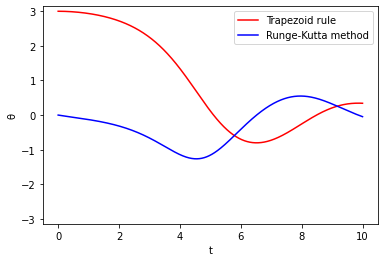

In [ ]:
#this script explores the non-linear pendulum equation using both the Runge-kutta method and the trapezoid rule
import matplotlib.pylab as plt
import numpy as np
import math

#setting the value of k, phi and A to there respective numbers as mentioned in 4b
k=0.5
phi=0.66667
A=0.0

#defining the value of the gravitational constant and length of the string
L=1.0
g=1.0

#introducing equation 11 as instructed (4a)
#the sin (theta) was made into a theta as we are working with a linear pendulum
def f_nonlin(theta,omega,t):
  f=(-g/L)*(math.sin(theta))-(k*omega)+A*(math.cos(phi*t))
  return f

#initializing the values mentioned in 7d
theta=3.0
omega=0.0
t=0.0
dt=0.01

#creating lists to store values, that are going to be plotted later 
R_theta_list=[theta]
R_omega_list=[omega]
R_t_list=[t]

T_theta_list=[theta]
T_omega_list=[omega]
T_t_list=[t]

#assigning the values of theta and omega dependin on which method is being used
R_theta=theta
R_omega=omega
R_t=t

T_theta=theta
T_omega=omega
T_t=t

#adding the trapezoid code
for i in range(1000):
  k1a = dt * T_omega
  k1b = dt * f_nonlin(T_theta, T_omega, T_t)
  k2a = dt * (T_omega + k1b)
  k2b = dt * f_nonlin(T_theta + k1a, T_omega + k1b, T_t + dt)
  T_theta = T_theta + (k1a + k2a)/2
  T_omega = T_omega + (k1b + k2b)/2
  
  T_t = T_t + dt

  #updating the appropriate lists as the values are being determined in each iteration
  T_theta_list.append(T_theta)
  T_omega_list.append(T_omega)
  T_t_list.append(T_t)

#adding the Runge-Kutta method
for j in range (1000):
  k1a=dt*R_omega
  k1b=dt*f_nonlin(R_theta, R_omega, R_t)
  k2a=dt*(R_omega+k1b/2)
  k2b=dt*f_nonlin(R_theta+k1a/2, R_omega+k1b/2, R_t+dt/2)
  k3a=dt*(R_omega+k2b/2)
  k3b=dt*f_nonlin(R_theta+k2a/2, R_omega+k2b/2, R_t+dt/2)
  k4a=dt*(R_omega+k3b)
  k4b=dt*f_nonlin(R_theta+k3a, R_omega+k3b, R_t+dt)

  R_theta=R_theta+(k1a+2*k2a+2*k3a+k4a)/6
  R_omega=R_omega+(k1b+2*k2b+2*k3b+k4b)/6
  
  R_t=R_t+dt

  #updating the appropriate lists as the values are being determined in each iteration
  R_theta_list.append(R_theta)
  R_omega_list.append(R_omega)
  R_t_list.append(R_t)


#ploting theta and omega as a function of time
plt.plot(T_t_list,T_theta_list, label='Trapezoid rule', color='red')
plt.plot(R_t_list, R_omega_list, label='Runge-Kutta method', color='blue')
plt.xlabel('t')
plt.ylabel('θ')
plt.ylim([-np.pi,np.pi])
plt.legend()
plt.show()